In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_rows = 4000
pd.options.display.max_columns = None
pd.options.display.float_format = '{:.3f}'.format 
np.set_printoptions(suppress=True, precision=5)

import warnings
warnings.filterwarnings("ignore")

# TIỀN XỬ LÝ DỮ LIỆU

In [61]:
df = pd.read_csv(r'E:\learn st new\Credit score\loan_data_2007_2014.csv', low_memory= False, index_col=0 )
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.000,36 months,10.650,162.870,B,B2,NaN,10+ years,RENT,24000.000,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.650,0.000,Jan-85,1.000,NaN,NaN,3.000,0.000,13648,83.700,9.000,f,0.000,0.000,5861.071,5831.780,5000.000,861.070,0.000,0.000,0.000,Jan-15,171.620,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.000,60 months,15.270,59.830,C,C4,Ryder,< 1 year,RENT,30000.000,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.000,0.000,Apr-99,5.000,NaN,NaN,3.000,0.000,1687,9.400,4.000,f,0.000,0.000,1008.710,1008.710,456.460,435.170,0.000,117.080,1.110,Apr-13,119.660,NaN,Sep-13,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.000,36 months,15.960,84.330,C,C5,NaN,10+ years,RENT,12252.000,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.720,0.000,Nov-01,2.000,NaN,NaN,2.000,0.000,2956,98.500,10.000,f,0.000,0.000,3003.654,3003.650,2400.000,603.650,0.000,0.000,0.000,Jun-14,649.910,NaN,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.000,36 months,13.490,339.310,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.000,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.000,0.000,Feb-96,1.000,35.000,NaN,10.000,0.000,5598,21.000,37.000,f,0.000,0.000,12226.302,12226.300,10000.000,2209.330,16.970,0.000,0.000,Jan-15,357.480,NaN,Jan-15,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.000,60 months,12.690,67.790,B,B5,University Medical Group,1 year,RENT,80000.000,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.940,0.000,Jan-96,0.000,38.000,NaN,15.000,0.000,27783,53.900,38.000,f,766.900,766.900,3242.170,3242.170,2233.100,1009.070,0.000,0.000,0.000,Jan-16,67.790,Feb-16,Jan-16,0.000,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Kiểm tra id và id member có trùng không

In [11]:
df.shape

(466285, 74)

In [12]:
df.drop_duplicates(subset = ['member_id', 'id'])
df.shape

(466285, 74)

In [13]:
# 2 cột trùng dữ liệu nên drop 1 cột
df = df.drop(columns = 'member_id')

Xử lý dữ liệu khuyết thiếu

In [14]:
pct_missing_value = 100* df.isnull().sum()/df.shape[0]
pct_missing_value

id                              0.000
loan_amnt                       0.000
funded_amnt                     0.000
funded_amnt_inv                 0.000
term                            0.000
int_rate                        0.000
installment                     0.000
grade                           0.000
sub_grade                       0.000
emp_title                       5.917
emp_length                      4.505
home_ownership                  0.000
annual_inc                      0.001
verification_status             0.000
issue_d                         0.000
loan_status                     0.000
pymnt_plan                      0.000
url                             0.000
desc                           72.982
purpose                         0.000
title                           0.004
zip_code                        0.000
addr_state                      0.000
dti                             0.000
delinq_2yrs                     0.006
earliest_cr_line                0.006
inq_last_6mt

In [15]:
df.acc_now_delinq.unique()

array([ 0.,  1., nan,  2.,  3.,  5.,  4.])

In [16]:
# Loại bỏ những column có khuyết thiếu nhiều
df = df.drop(columns = [x for x in pct_missing_value[pct_missing_value >= 70].index])

In [17]:
df[['emp_title', 'emp_length']]

,emp_title,emp_length
0,NaN,10+ years
1,Ryder,< 1 year
2,NaN,10+ years
3,AIR RESOURCES BOARD,10+ years
4,University Medical Group,1 year
...,...,...
466280,Financial Advisor,4 years
466281,Chief of Interpretation (Park Ranger),10+ years
466282,patrol,7 years
466283,Server Engineer Lead,3 years


In [18]:
# Kiểm tra các loại nhân viên
df_emp_title = df.emp_title.unique()
df_emp_title = pd.DataFrame(df_emp_title)
df_emp_title

,0
0,NaN
1,Ryder
2,AIR RESOURCES BOARD
3,University Medical Group
4,Veolia Transportaton
...,...
205471,C N A
205472,Lead sales
205473,MecÃ¡nica
205474,Chief of Interpretation (Park Ranger)


Do số lượng chức danh nhân viên chiếm quá nửa bộ dữ liệu nên sẽ không có ý nghĩa nếu thêm biến này \
Loại emp_title

In [19]:
df = df.drop(columns = 'emp_title')

In [20]:
df.emp_length = df.emp_length.str.replace('\+ years', '')
df.emp_length = df.emp_length.str.replace('\< 1 year', str(0))
df.emp_length = df.emp_length.replace(np.nan, str(0))
df.emp_length = df.emp_length.str.replace(' year', '')
df.emp_length = df.emp_length.str.replace(' years', '')
df.emp_length = df.emp_length.str.replace('s', '')
# Chuyển dữ liệu sang dạng số
df.emp_length = pd.to_numeric(df.emp_length)

Đối với nhân viên trên 10 năm, đổi mặc định là 10, giả định rằng những nhân viên 10+ là những nhân viên kỳ cựu \
Dưới 1 năm và nan là những người chưa đi làm/chưa có kinh nghiệm nên để =0

In [21]:
100*df.isnull().sum()/df.shape[0]

id                            0.000
loan_amnt                     0.000
funded_amnt                   0.000
funded_amnt_inv               0.000
term                          0.000
int_rate                      0.000
installment                   0.000
grade                         0.000
sub_grade                     0.000
emp_length                    0.000
home_ownership                0.000
annual_inc                    0.001
verification_status           0.000
issue_d                       0.000
loan_status                   0.000
pymnt_plan                    0.000
url                           0.000
purpose                       0.000
title                         0.004
zip_code                      0.000
addr_state                    0.000
dti                           0.000
delinq_2yrs                   0.006
earliest_cr_line              0.006
inq_last_6mths                0.006
mths_since_last_delinq       53.691
open_acc                      0.006
pub_rec                     

Có một số biến chứa tỉ lệ missing rất thấp dưới 5% vì vậy nên thay vì cố thay thế nó bằng một giá trị, ta có thể loại bỏ nó để việc xử lý dễ dàng hơn

In [22]:
df = df.dropna(subset = ['annual_inc','title','delinq_2yrs','earliest_cr_line','inq_last_6mths',
                         'revol_util','last_pymnt_d','collections_12_mths_ex_med','acc_now_delinq','last_credit_pull_d','policy_code'])

In [23]:
# Xử lý các biến định tính
cat_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

for col in cat_col:
    print(col)
    print(df[col].unique())
    print()

term
[' 36 months' ' 60 months']

grade
['B' 'C' 'A' 'E' 'F' 'D' 'G']

sub_grade
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'C2' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']

home_ownership
['RENT' 'OWN' 'MORTGAGE' 'OTHER' 'NONE' 'ANY']

verification_status
['Verified' 'Source Verified' 'Not Verified']

issue_d
['Dec-11' 'Nov-11' 'Oct-11' 'Sep-11' 'Aug-11' 'Jul-11' 'Jun-11' 'May-11'
 'Apr-11' 'Mar-11' 'Feb-11' 'Jan-11' 'Dec-10' 'Nov-10' 'Oct-10' 'Sep-10'
 'Aug-10' 'Jul-10' 'Jun-10' 'May-10' 'Apr-10' 'Mar-10' 'Feb-10' 'Jan-10'
 'Dec-09' 'Nov-09' 'Oct-09' 'Sep-09' 'Aug-09' 'Jul-09' 'Jun-09' 'May-09'
 'Apr-09' 'Mar-09' 'Feb-09' 'Jan-09' 'Dec-08' 'Nov-08' 'Oct-08' 'Sep-08'
 'Aug-08' 'Jul-08' 'Jun-08' 'May-08' 'Apr-08' 'Mar-08' 'Feb-08' 'Jan-08'
 'Dec-07' 'Nov-07' 'Oct-07' 'Sep-07' 'Aug-07' 'Dec-13' 'Nov-13' 'Oct-13'
 'Sep-13' 'Aug-13' 'Jul-13' 'Jun-13' 'May-13' 'Apr-13' 'Mar-13' 'Feb-13'
 'Jan-13' 'Dec-12

Cột sub_grade trùng ý nghĩa với grade nên loại \
Application_type chỉ có 1 nên loại \
zip_code, title, url, address không có ý nghĩa nên loại

Đổi các dữ liệu thời gian sang datetime

In [24]:
df = df.drop(columns = ['sub_grade','application_type', 'zip_code','title', 'url','addr_state'])

In [25]:
df.issue_d = pd.to_datetime(df.issue_d, format ='%b-%y')
df.earliest_cr_line = pd.to_datetime(df.earliest_cr_line,format ='%b-%y')
df.last_pymnt_d = pd.to_datetime(df.last_pymnt_d,format ='%b-%y')
df.last_credit_pull_d = pd.to_datetime(df.last_credit_pull_d, format = '%b-%y')
df.next_pymnt_d = pd.to_datetime(df.next_pymnt_d, format = '%b-%y')

In [60]:
# Kiểm tra lại dữ liệu
df.head()

,id,loan_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,acc_now_delinq,delinq_pct,loan_issue_m,cr_line_issue_m,earliest_cr_year,total_installment,pymnt_blance_rate
0,1077501,5000,36,10.650,162.870,B,10,RENT,24000.000,Verified,2011-12-01,0,credit_card,27.650,0.000,1985-01-01,1.000,0.000,3.000,0.000,13648,83.700,9.000,f,0.000,5831.780,5000.000,861.070,0.000,0.000,0.000,2015-01-01,171.620,2016-01-01,0.000,1,0.000,0.000,48.000,371.000,1985,6487.764,23.201
1,1077430,2500,60,15.270,59.830,C,0,RENT,30000.000,Source Verified,2011-12-01,1,car,1.000,0.000,1999-04-01,5.000,0.000,3.000,0.000,1687,9.400,4.000,f,0.000,1008.710,456.460,435.170,0.000,117.080,1.110,2013-04-01,119.660,2013-09-01,0.000,1,0.000,0.000,48.000,201.000,1999,4137.962,12.117
2,1077175,2400,36,15.960,84.330,C,10,RENT,12252.000,Not Verified,2011-12-01,0,small_business,8.720,0.000,2001-11-01,2.000,0.000,2.000,0.000,2956,98.500,10.000,f,0.000,3003.650,2400.000,603.650,0.000,0.000,0.000,2014-06-01,649.910,2016-01-01,0.000,1,0.000,0.000,48.000,169.000,2001,3520.406,33.839
3,1076863,10000,36,13.490,339.310,C,10,RENT,49200.000,Source Verified,2011-12-01,0,other,20.000,0.000,1996-02-01,1.000,35.000,10.000,0.000,5598,21.000,37.000,f,0.000,12226.300,10000.000,2209.330,16.970,0.000,0.000,2015-01-01,357.480,2015-01-01,0.000,1,0.000,0.000,48.000,238.000,1996,13862.985,41.500
4,1075358,3000,60,12.690,67.790,B,1,RENT,80000.000,Source Verified,2011-12-01,0,other,17.940,0.000,1996-01-01,0.000,38.000,15.000,0.000,27783,53.900,38.000,f,766.900,3242.170,2233.100,1009.070,0.000,0.000,0.000,2016-01-01,67.790,2016-01-01,0.000,1,0.000,0.000,48.000,239.000,1996,4583.553,9.167


In [27]:
cat_col = []
num_col = []
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        cat_col.append(x)

for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        num_col.append(i)

In [28]:
cat_col

['term',
 'grade',
 'home_ownership',
 'verification_status',
 'loan_status',
 'pymnt_plan',
 'purpose',
 'initial_list_status']

Số biến demographic:  8


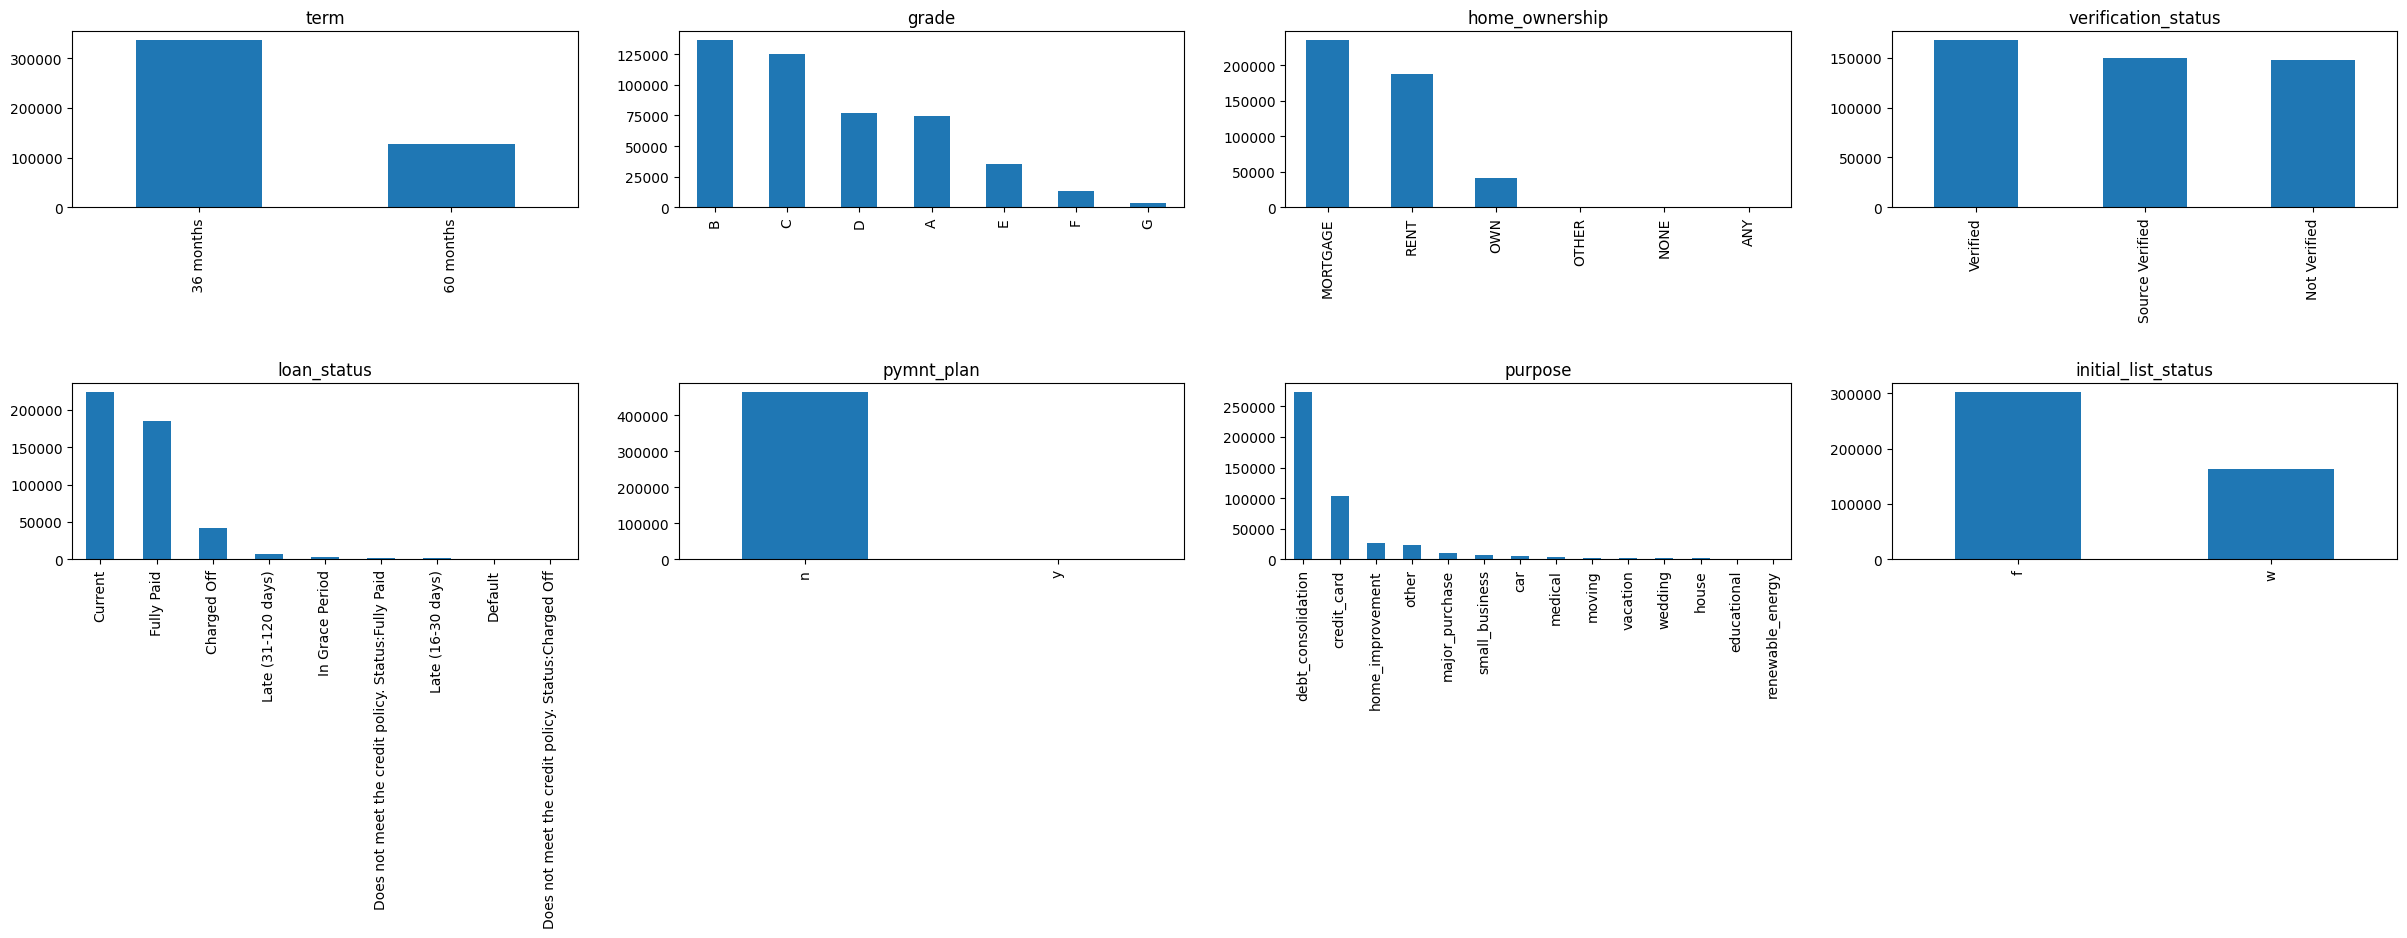

In [29]:
# Mô tả biến định tính
def plot_bar_classes(df, cols):
    df[cols].value_counts().plot.bar()

def distribution_cate(df, cat_col, row = 1, col = 2, figsize = (20, 5)):
  print('Số biến demographic: ', len(cat_col))
  plt.figure(figsize = figsize)
  plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=1)    
  for i in range(1, len(cat_col)+1):
    try:
      plt.subplot(row, col, i)
      plot_bar_classes(df, cat_col[i-1])
      plt.title(cat_col[i-1])
    except:
      break

distribution_cate(df, cat_col, row = 4, col = 4, figsize = (30, 16))

In [30]:
df.pymnt_plan.value_counts() 

n    465393
y         9
Name: pymnt_plan, dtype: int64

- Số lượng other - none - any trong nhóm home_ownership ít nên gộp chung vào rent
- pymnt_plan == y có số lượng ít nên coi mặc định lượng pymnt_plan chỉ có 1 loại và bỏ biến này khỏi mô hình

Số biến định lượng:  38


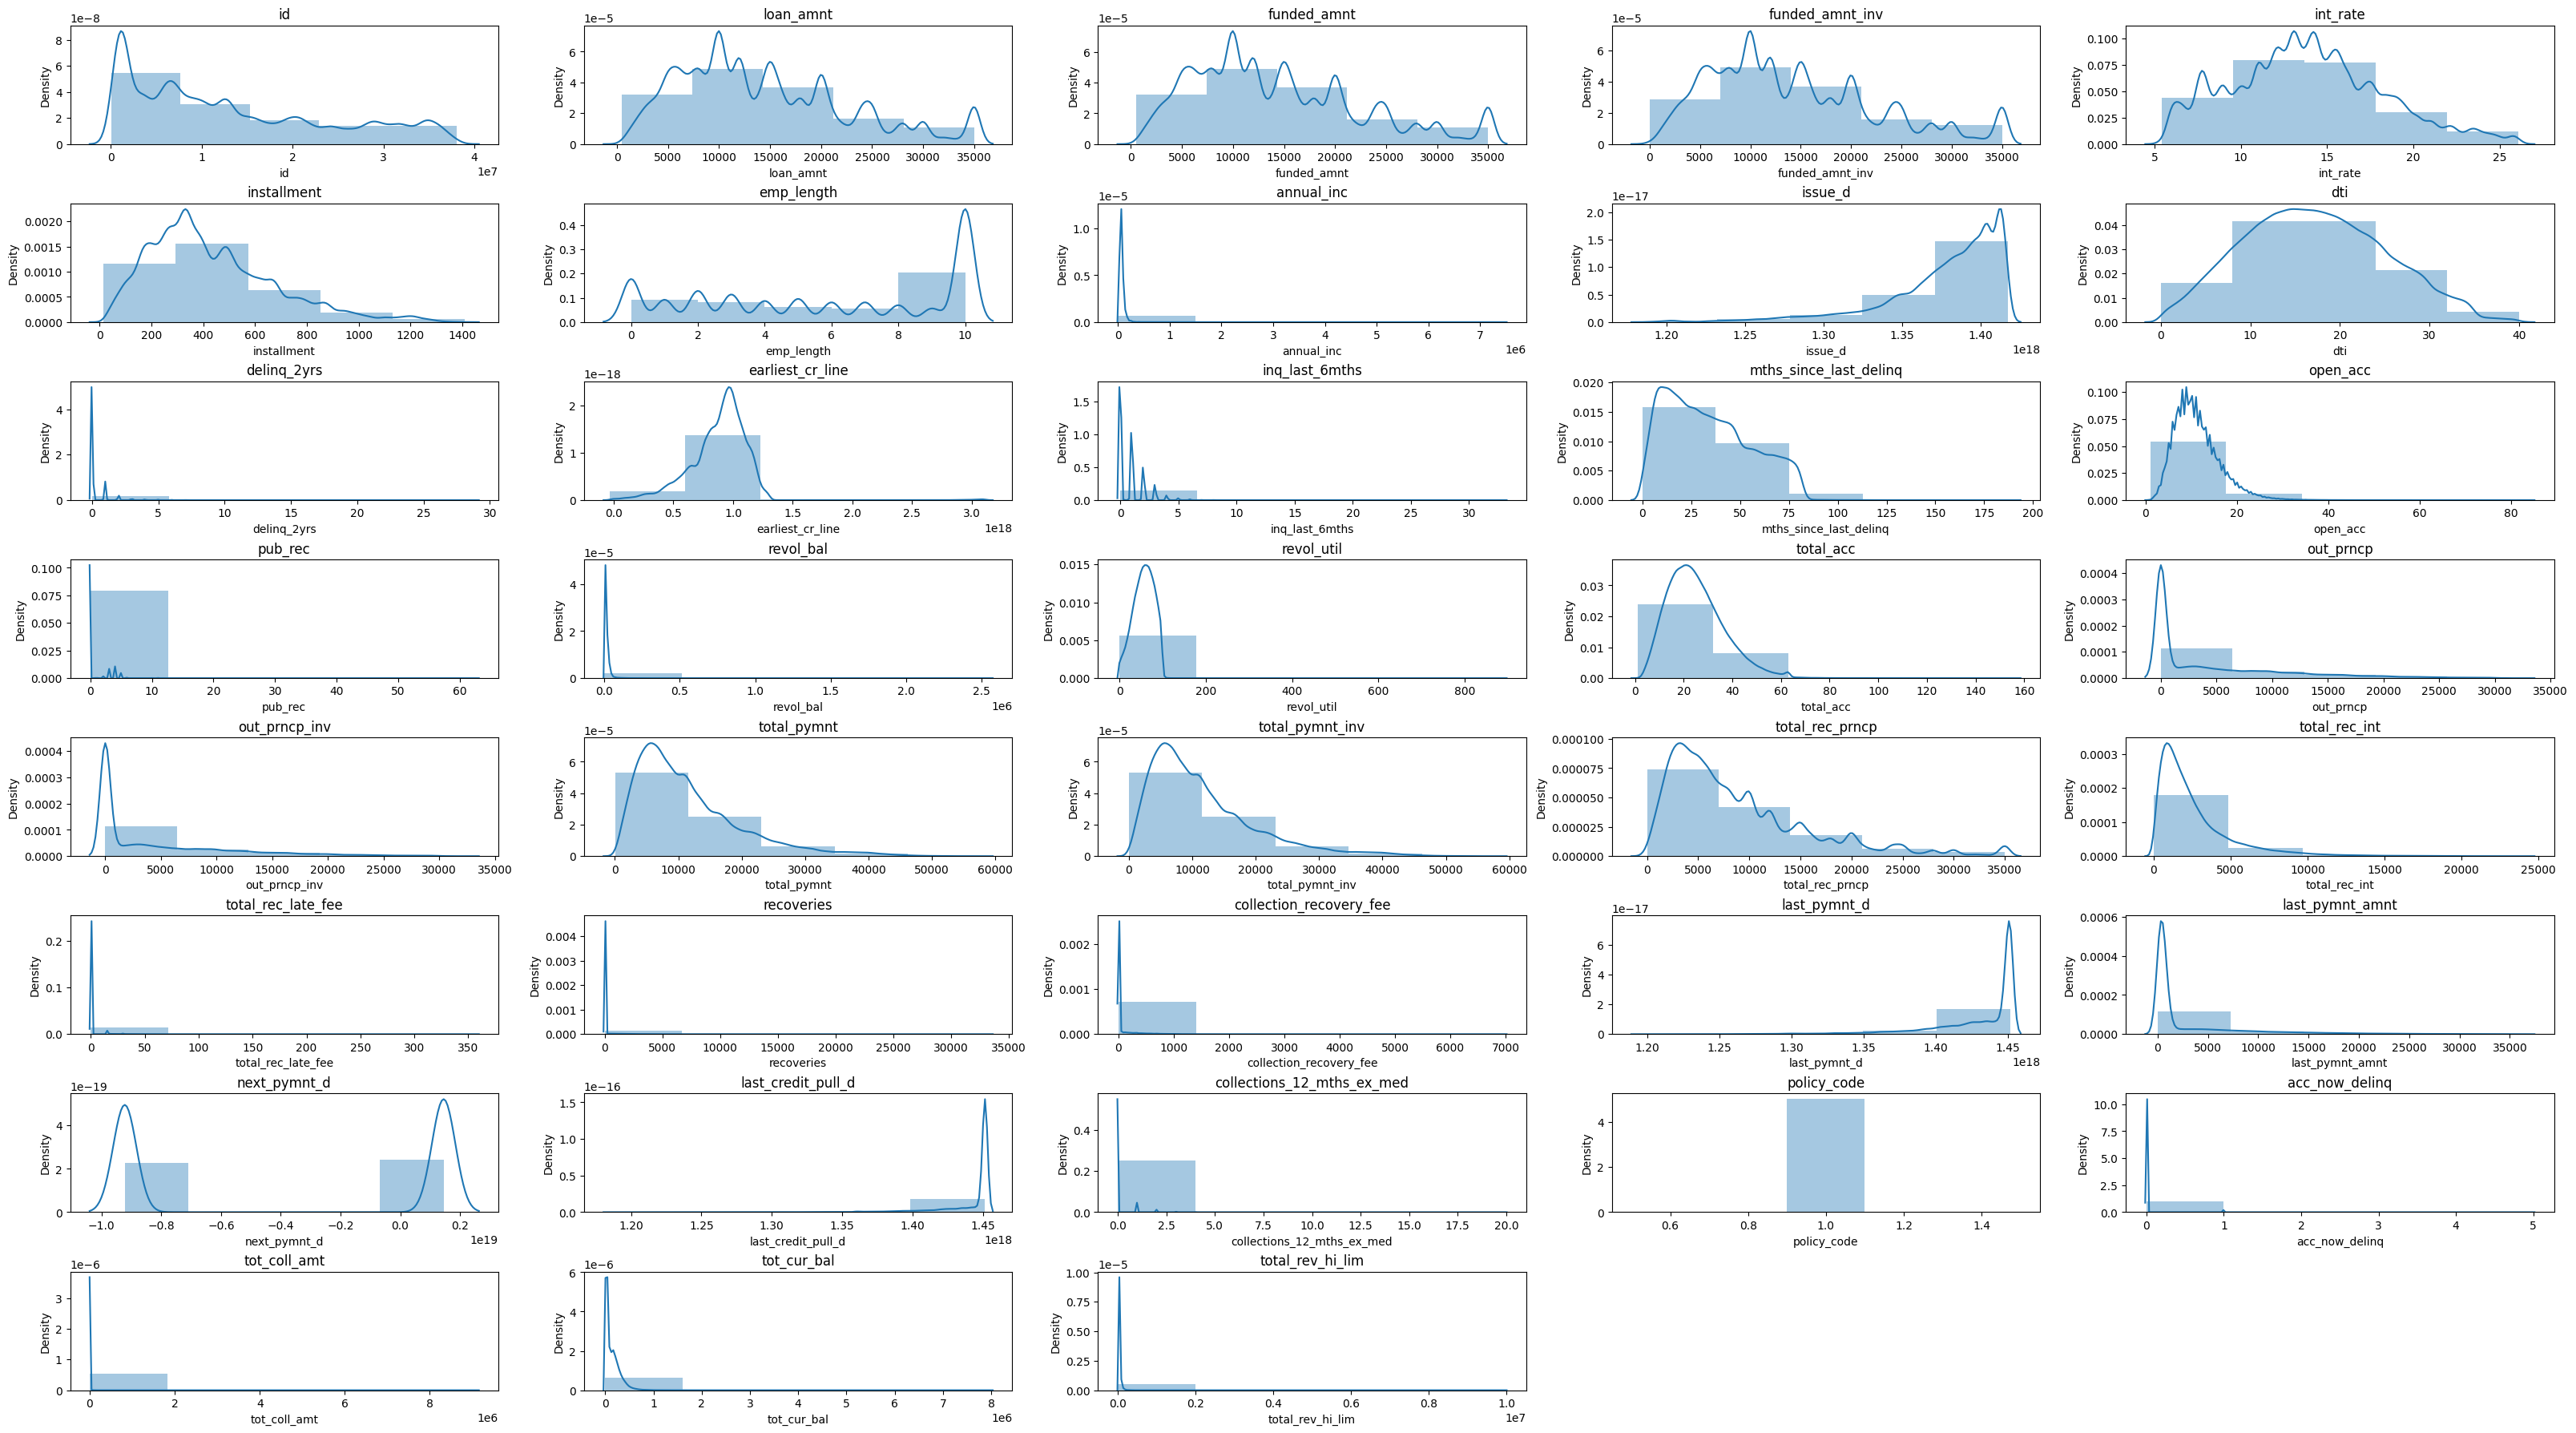

In [31]:
# Mô tả biến định lượng

def _plot_numeric_classes(df, col, bins=10, hist=True, kde=True):
    sns.distplot(df[col],
                 bins = bins,
                 hist = hist,
                 kde = kde)

def distribution_numeric(df, numeric_cols, row= 9, col=5, figsize=(40, 25), bins = 5):
    print('Số biến định lượng: ', len(numeric_cols))
    #assert row*(col-1) < len(numeric_cols)
    plt.figure(figsize = figsize)
    plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.2, hspace=0.5)
    for i in range(1, len(numeric_cols)+1):
      try:
        plt.subplot(row, col, i)
        _plot_numeric_classes(df, numeric_cols[i-1], bins = bins)
        plt.title(numeric_cols[i-1])
      except:
        print('Error {}'.format(numeric_cols[i-1]))
        break

distribution_numeric(df, num_col)

- Phân phối và giá trị của loan_amnt, funded_amnt, funded_amnt_inv giống nhau, nên loại 2 trong 3 biến
- Total_pymnt và total_pymnt_inv tương tự, nên loại 1 trong 2 biến
- out_prncp và out_prncp_inv tương tự, nên loại 1 trong 2 biến
- collections_12_mths_ex_med, acc_now_deling nên loại do quá 75% số dữ liệu là 0

In [32]:
df =  df.drop(columns = ['out_prncp','total_pymnt','funded_amnt', 'funded_amnt_inv'])

In [33]:
df = df.drop(columns = 'pymnt_plan')
df.home_ownership = df.home_ownership.replace('OTHER', 'RENT')
df.home_ownership = df.home_ownership.replace('NONE', 'RENT')
df.home_ownership = df.home_ownership.replace('ANY', 'RENT' )

In [34]:
# %delinquency in the last 12 months (Behaviourial Risk)
df['delinq_pct'] = 100* df['delinq_2yrs']/df['mths_since_last_delinq']
df['delinq_pct']= df['delinq_pct'].replace(np.nan, 0)
df['delinq_pct']= df['delinq_pct'].replace(np.inf, 100)

In [35]:
# Thời gian tính từ lần đầu hạn mức tín dụng được đặt và tg tính từ lần đầu khoản vay được được đặt
df['loan_issue_m'] = pd.to_datetime('2015-12-31') - df['issue_d']
df['loan_issue_m'] = df['loan_issue_m'].astype('timedelta64[M]')

df['cr_line_issue_m'] = pd.to_datetime('2015-12-31') - df['earliest_cr_line']
df['cr_line_issue_m'] =  df['cr_line_issue_m'].astype('timedelta64[M]')


In [36]:
df[['cr_line_issue_m','loan_issue_m']].describe()

,cr_line_issue_m,loan_issue_m
count,465402.000,465402.000
mean,215.720,27.423
std,94.018,14.256
min,-636.000,12.000
25%,159.000,18.000
50%,202.000,23.000
75%,262.000,34.000
max,563.000,100.000


In [37]:
#những tín dụng có số ngày được mở âm 
df.loc[:, ['earliest_cr_line','cr_line_issue_m']][df.cr_line_issue_m< 0].head()

,earliest_cr_line,cr_line_issue_m
1580,2062-09-01,-561.000
1770,2068-09-01,-633.000
2799,2064-09-01,-585.000
3282,2067-09-01,-621.000
3359,2065-02-01,-590.000


Loại những hạn mức tín dụng lớn hơn 2016

In [38]:
df['earliest_cr_year'] = df['earliest_cr_line'].dt.year
df = df[df['earliest_cr_year'] < 2016]

In [39]:
# Các trạng thái trả nợ Current và In Grace Period khá là khó để phân loại nhóm này đang được phân loại là đang nợ tín dụng hay có điểm tín dụng tốt
df.loan_status.value_counts()

Current                                                223448
Fully Paid                                             184164
Charged Off                                             41929
Late (31-120 days)                                       6880
In Grace Period                                          3142
Does not meet the credit policy. Status:Fully Paid       1908
Late (16-30 days)                                        1212
Default                                                   828
Does not meet the credit policy. Status:Charged Off       724
Name: loan_status, dtype: int64

Đối với khách hàng đang có tình trạng current: 
- Nếu khách hàng có số lần inquiry trong vòng 6 tháng nhiều và dti > mức phân vị 50%, tỉ lệ hoàn trả nợ > mức phân vị 50%, khả năng cao khách hàng đó sẽ nguy cơ nợ xấu
- Đối với những khách còn lại, là không bị nợ xấu.

Đối với khách hàng ở tình trạng Late 16-30, tương tự với khách có loan_status là current:
- Nếu khách hàng có số lần inquiry trong vòng 6 tháng nhiều và dti > mức phân vị 50%, tỉ lệ hoàn trả nợ > mức phân vị 50%, khả năng cao khách hàng đó sẽ nguy cơ nợ xấu
- Lượng còn lại loại ra khỏi mô hình

In [40]:
df['term'] = df['term'].str.replace(' months', '')
df['term'] = df['term'].astype('int64')

# Khoản trả góp
df['total_installment'] = df['installment']*df['term']*(1+df['int_rate']/100)

# Tính mức độ mà khách hàng sẵn sàng trả nợ
df['pymnt_blance_rate'] = 100* df['total_pymnt_inv']/(df['loan_amnt']+df['revol_bal']+df['total_installment'])

In [41]:
df[['pymnt_blance_rate','dti','inq_last_6mths']].describe()

,pymnt_blance_rate,dti,inq_last_6mths
count,464235.000,464235.000,464235.000
mean,23.564,17.225,0.804
std,10.911,7.848,1.090
min,0.000,0.000,0.000
25%,14.467,11.370,0.000
50%,22.534,16.880,0.000
75%,32.710,22.790,1.000
max,63.762,39.990,33.000


In [42]:
df2 = df.copy()

In [43]:
# Số khách nợ xấu current
df[['loan_status','inq_last_6mths','mths_since_last_delinq','delinq_2yrs','dti','pymnt_blance_rate']][(df['inq_last_6mths']>1) & (df['loan_status']== 'Current') &(df['dti']>=17) & (df['pymnt_blance_rate']>=23)].shape

(4780, 6)

In [44]:
# Số khách nợ xấu late 16-30
df[['loan_status','inq_last_6mths','mths_since_last_delinq','delinq_2yrs','dti','pymnt_blance_rate']][(df['inq_last_6mths']>1) & (df['loan_status']== 'Late (16-30 days)') &(df['dti']>=17) & (df['pymnt_blance_rate']>=23)].shape

(34, 6)

Lấy 1 = default

In [45]:
df.loan_status.value_counts()

Current                                                223448
Fully Paid                                             184164
Charged Off                                             41929
Late (31-120 days)                                       6880
In Grace Period                                          3142
Does not meet the credit policy. Status:Fully Paid       1908
Late (16-30 days)                                        1212
Default                                                   828
Does not meet the credit policy. Status:Charged Off       724
Name: loan_status, dtype: int64

In [46]:
a = pd.Series(df['loan_status'][(df['inq_last_6mths']>1) & (df['loan_status']== 'Late (16-30 days)') &(df['dti']>=17) & (df['pymnt_blance_rate']>=23)].index)
b = pd.Series(df[(df['inq_last_6mths']>1) & (df['loan_status']== 'Current') &(df['dti']>=17) & (df['pymnt_blance_rate']>=23)].index)
c = pd.Series(df[(df.loan_status == 'Charged Off') | (df.loan_status =='Late (31-120 days)') | (df.loan_status == 'Late (16-30 days)') | (df.loan_status == 'Does not meet the credit policy. Status:Charged Off') | (df.loan_status == 'Default')].index)

In [47]:
default_index = {'x': a,'y':b,'z': c}
d_index = pd.concat(default_index).sort_values()
d_index = list(d_index)
len(d_index)

56387

Lấy 0 = non default

In [48]:
df =  df[(df.loan_status !='In Grace Period')]

In [49]:
df['loan_status'] = np.where(df['loan_status'].index.isin(d_index), 1, 0)

In [50]:
for i in list(df['loan_status'][(df.loan_status =='Fully Paid') | (df.loan_status =='Does not meet the credit policy. Status:Fully Paid')|(df.loan_status =='Current')].index):
    df['loan_status'] = df['loan_status'].replace(df['loan_status'][i], 0)

In [51]:
100*df.loan_status.value_counts()/df.shape[0]

0   87.778
1   12.222
Name: loan_status, dtype: float64

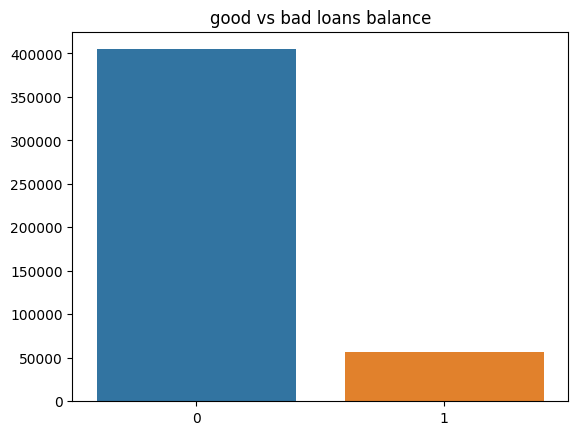

In [52]:
plt.title('good vs bad loans balance')
sns.barplot(x= df.loan_status.value_counts().index ,y=df.loan_status.value_counts().values)
pass

In [53]:
# 3 cột 'tot_coll_amt','tot_cur_bal','total_rev_hi_lim' có số lượng null khá lớn, chiếm trên khoảng 28%
df[['tot_coll_amt','tot_cur_bal','total_rev_hi_lim']].describe()

,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,391374.000,391374.000,391374.000
mean,191.219,138836.546,30393.444
std,14714.139,151949.322,37285.837
min,0.000,0.000,100.000
25%,0.000,28647.000,13600.000
50%,0.000,81712.000,22900.000
75%,0.000,209060.750,37900.000
max,9152545.000,8000078.000,9999999.000


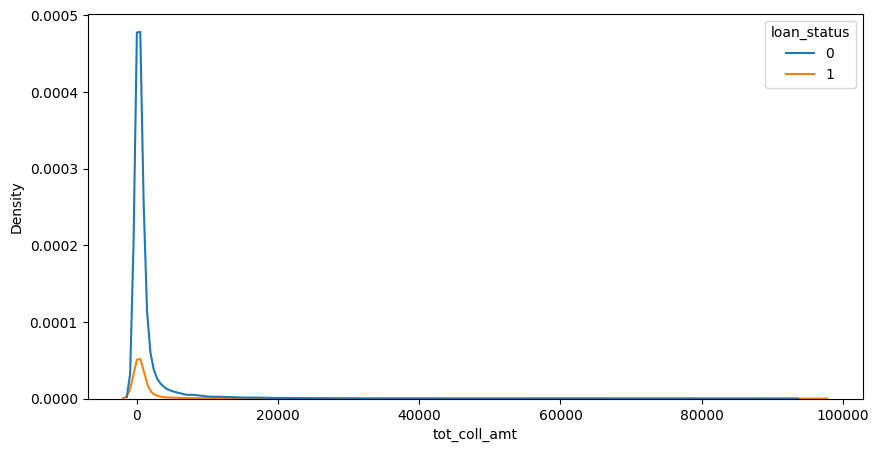

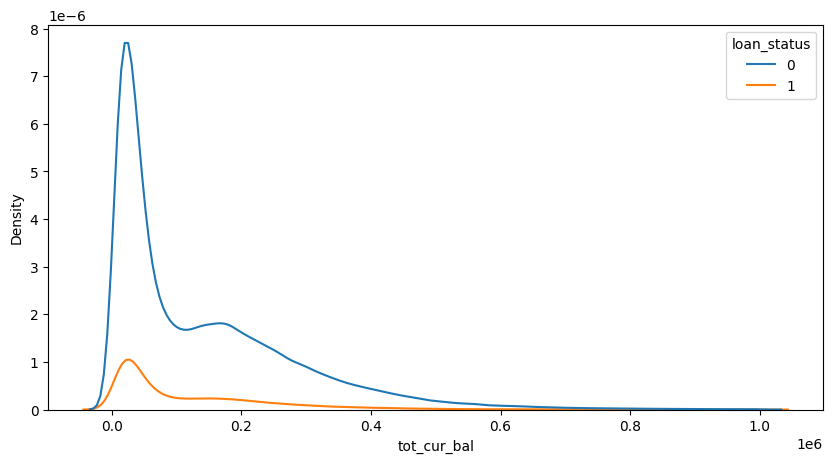

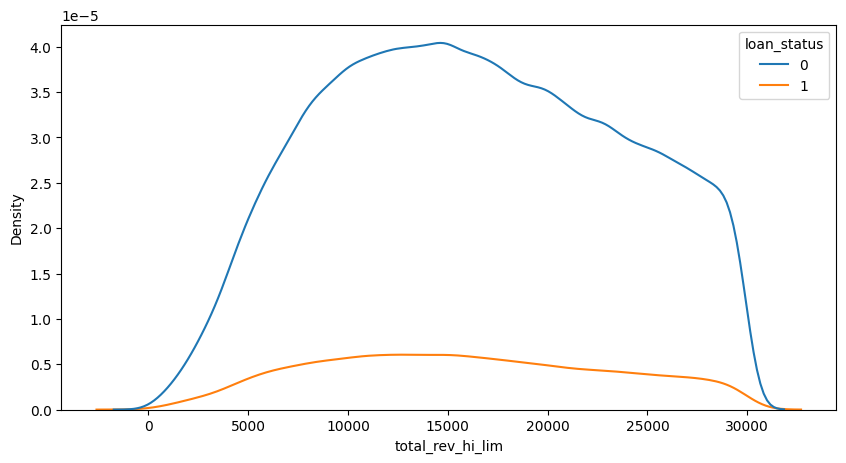

In [54]:
# Đồ thị minh họa 3 cột dữ liệu
plt.figure(figsize = (10,5))
sns.kdeplot(data = df[(df['tot_coll_amt']< 100000) &(df['tot_coll_amt'] >0) ], x ='tot_coll_amt', hue ='loan_status')

plt.figure(figsize = (10,5))
sns.kdeplot(data= df[df['tot_cur_bal'] < 1000000], x='tot_cur_bal',  hue ='loan_status')

plt.figure(figsize = (10,5))
sns.kdeplot(data= df[df['total_rev_hi_lim'] < 30000], x='total_rev_hi_lim', hue ='loan_status')

pass

### Kết luận
<ul>
    <li> Cột tot_toll_amt có lượng giá trị 0 chiếm ít nhất 75% lượng giá trị
    <li> Giá trị trung bình và giá trị tối đa chênh lệch khá nhiều, nên phân bố dữ liệu không chuẩn
    <li> Biểu đồ phân phối giá trị chia theo chất lượng khoản vay giống nhau

Nên loại 3 biến này ra khỏi mô hình

In [55]:
df = df.drop(columns = ['tot_coll_amt','tot_cur_bal','total_rev_hi_lim'])

In [56]:
df[['mths_since_last_delinq','next_pymnt_d', 'last_pymnt_d','delinq_2yrs']]

,mths_since_last_delinq,next_pymnt_d,last_pymnt_d,delinq_2yrs
0,NaN,NaT,2015-01-01,0.000
1,NaN,NaT,2013-04-01,0.000
2,NaN,NaT,2014-06-01,0.000
3,35.000,NaT,2015-01-01,0.000
4,38.000,2016-02-01,2016-01-01,0.000
...,...,...,...,...
466280,NaN,2016-02-01,2016-01-01,0.000
466281,NaN,NaT,2014-12-01,0.000
466282,65.000,2016-02-01,2016-01-01,0.000
466283,13.000,NaT,2014-12-01,3.000


<li> next_pymnt_d có missing lớn và không có ý nghĩa nên ta sẽ bỏ [cột] dữ liệu này
<li> Số tháng kể từ lần gần nhất trễ hạn thay thế = 0

In [57]:
df = df.drop(columns = 'next_pymnt_d')
df['mths_since_last_delinq'] = df['mths_since_last_delinq'].replace(np.nan, 0)

In [59]:
df[['mths_since_last_delinq','acc_now_delinq']]

,mths_since_last_delinq,acc_now_delinq
0,0.000,0.000
1,0.000,0.000
2,0.000,0.000
3,35.000,0.000
4,38.000,0.000
...,...,...
466280,0.000,0.000
466281,0.000,0.000
466282,65.000,0.000
466283,13.000,0.000


In [58]:
df.to_csv('E:\learn st new\Credit score\loan_data_clean.csv', index= False)